# Read Json File

In [4]:
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter
from skimage import img_as_float
from skimage.morphology import reconstruction

train=pd.read_json("input/train.json")

train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


# Feature Engeering

In [45]:
def transform(arr):
    img=img_as_float(np.reshape(np.array(arr),[75,75]))
    img=gaussian_filter(img,2.5)
    seed=np.copy(img)
    seed[1:-1,1:-1]=img.min()
    mask=img
    ##morphology processing
    pro_img=reconstruction(seed,mask,method="dilation")
    return img-pro_img

def judge(d):
    if d==0:
        return "Ship"
    if d==1:
        return "Iceberg"
train["trans1"]=train["band_1"].apply(transform)
train["trans2"]=train["band_2"].apply(transform)
train["judge"]=train["is_iceberg"].apply(judge)

# 2D Visualization

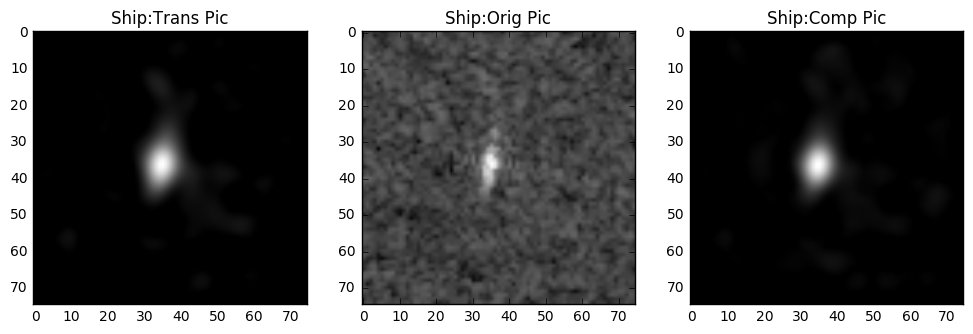

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
idx=0
fig=plt.figure(figsize=(12,4))

fig.add_subplot(131)
plt.imshow(train.trans1[idx],cmap="gray")
plt.title(train.judge[idx]+":Trans Pic")

fig.add_subplot(132)
plt.imshow(np.array(train.band_1[idx]).reshape([75,75]),cmap="gray")
plt.title(train.judge[idx]+":Orig Pic")

fig.add_subplot(133)
plt.imshow(train.trans2[idx]+train.trans1[0],cmap="gray")
plt.title(train.judge[idx]+":Comp Pic")
plt.show()

# 3D Visualization

In [47]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

img=train.trans1[idx]+train.trans2[idx]
data = [
    go.Surface(
        z=img
    )
]
layout = go.Layout(
    title=train.judge[idx]+' to 3D Surface',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)